In [8]:
# importing libraries
import numpy as np # for linear algebra
import pandas as pd # data preprocessing

import tensorflow as tf # deep learning
from tensorflow.keras import layers, models # type: ignore # working on layers
import matplotlib.pyplot as plt # data visualization

In [9]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [10]:
df = tf.keras.preprocessing.image_dataset_from_directory("C:/Users/sayan/OneDrive/Desktop/testing/ALL",shuffle=True,image_size= (IMAGE_SIZE,IMAGE_SIZE),
                                                        batch_size= BATCH_SIZE)

Found 1679 files belonging to 6 classes.


In [11]:
# getting class names
class_names = df.class_names
class_names

['basal cell carcinoma',
 'dermatofibroma',
 'nevus',
 'pigmented benign keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [12]:
# len of dataset ( Total number of files/ batch size)
len(df)

53

In [13]:
53*32

1696

In [14]:
print(df)  # None is the undefined batch size, (256,256) is the image size and 3 = channels(RGB)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


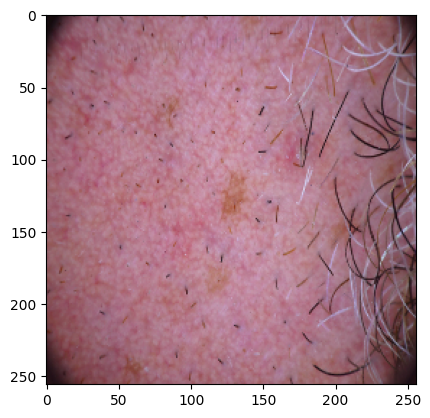

In [15]:
# viewing image 
for image_batch, label_batch in df.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    
    # plt.axis("off") : used to view image without axis points
# refreshing every time gives another picture and label as given

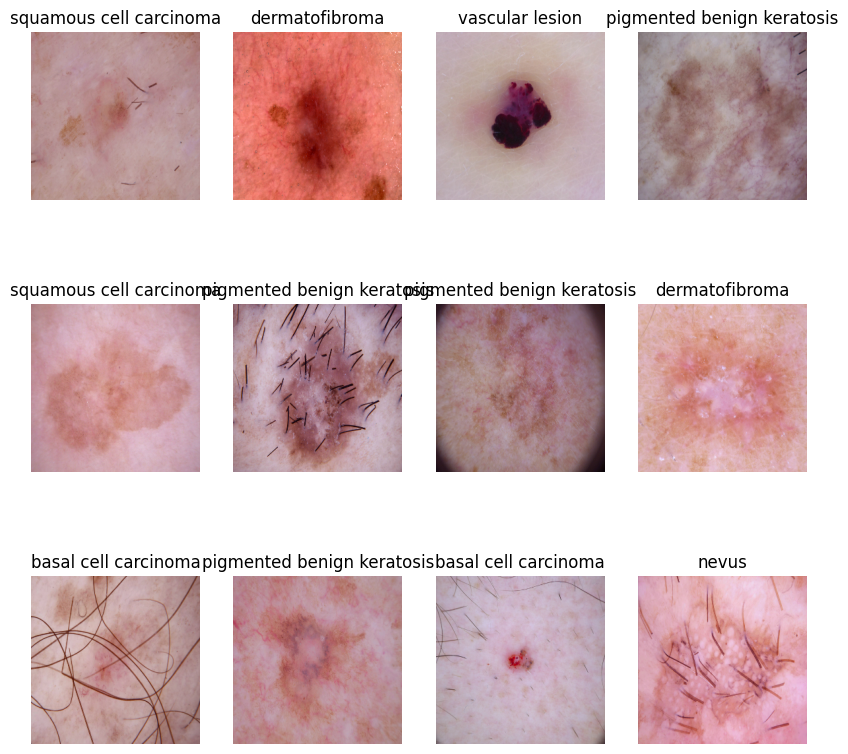

In [16]:
# images with the labels
plt.figure(figsize=(10,10))
for image_batch, label_batch in df.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
        
# refreshing every time gives another picture and label as given

In [17]:
#STEP 3 : SPLITTING DATASET    80% Training    20%:10% validation, 10% Testing
# channels (RGB[Red, Green, Blue]), Epochs = 50

In [18]:
# channels (RGB[Red, Green, Blue]), Epochs = 50
CHANNELS = 3
EPOCHS = 50

In [19]:
# checking the length of training data
train_size = 0.8
len(df) * train_size

42.400000000000006

In [20]:
val_n_test = len(df) - (len(df) * train_size)
val_n_test

10.599999999999994

In [21]:
# splitting the data into training , validation and testing data

def split_datasets(pc,train_split = 0.8,val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    if shuffle:
        pc = pc.shuffle(shuffle_size,seed = 10)
        
    pc_size = len(pc) # size of potato_data(68)
    train_size = int(train_split*pc_size)
    val_size = int(val_split*pc_size)
    
    train_pc = pc.take(train_size) # taking first 54 batches(out of 68)
    val_pc = pc.skip(train_size).take(val_size) # leaving first 54 and taking next 6 batches
    test_pc = pc.skip(train_size).skip(val_size) # skipping first 54(train) batch and 6(validation) batch and 
                                                 #taking left 8 batches for test
    
    return train_pc, val_pc, test_pc

In [22]:
# getting the training, validation and testing data by 'split_datasets' function
train_data, val_data, test_data = split_datasets(df)

In [23]:
# printing the size of all data splits
print("Size of Data is :{0} \nBatch Size of Training Data is :{1} \nBatch Size of Validation Data :{2} \nBatch Size of Test Data :{3}"
      .format(len(df), len(train_data), len(val_data), len(test_data)))

Size of Data is :53 
Batch Size of Training Data is :42 
Batch Size of Validation Data :5 
Batch Size of Test Data :6


In [24]:
# caching, shuffling and prefetching the data
train_pc = train_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_pc = val_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_pc = test_data.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
#Step 4 : Data Pre-Processing

In [26]:
# Image Preprocessing : Rescaling and Resizing
# Image Preprocessing: Rescaling and Resizing
rescale_n_resize = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  
    layers.Rescaling(1.0/255)
])

# Data Augmentation by flipping and rotating existing images
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical'),  
    layers.RandomRotation(factor=0.5)
])


In [27]:
#Step 5 : Model Building

In [28]:
# creating CNN
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    rescale_n_resize,
    data_augmentation,
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'softmax')
    
])

model.build(input_shape=input_shape)


c:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# model_summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 64)               │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,176 (1.32 MB)

 Trainable params: 346,176 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#optimizing the model
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [31]:
#Step 6 : Model Training and Analysis

In [40]:
# fitting the model
history = model.fit(train_data, epochs = EPOCHS, batch_size=BATCH_SIZE, validation_data=val_data, verbose=1)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 453ms/step - accuracy: 0.2259 - loss: 2.4816 - val_accuracy: 0.2812 - val_loss: 1.7080
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - accuracy: 0.2869 - loss: 1.6821 - val_accuracy: 0.4500 - val_loss: 1.4245
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 436ms/step - accuracy: 0.3834 - loss: 1.5625 - val_accuracy: 0.3938 - val_loss: 1.5638
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 440ms/step - accuracy: 0.3899 - loss: 1.5567 - val_accuracy: 0.4125 - val_loss: 1.4952
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 450ms/step - accuracy: 0.3979 - loss: 1.4940 - val_accuracy: 0.3812 - val_loss: 1.4753
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - accuracy: 0.4248 - loss: 1.4338 - val_accuracy: 0.4755 - val_loss: 1.3323
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 435ms/step - accuracy: 0.4788 - loss: 1.3738 - val_accuracy: 0.4000 - val_loss: 1.3967
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 476ms/step - accuracy: 0.4655 - loss: 1.3583 - val_accu

In [41]:
# evaluating the scores
scores = model.evaluate(train_data)
scores

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.6471 - loss: 0.9286


[0.9213858842849731, 0.6507462859153748]

In [42]:
# getting the keys of fitted model "History"
history.params, history.history.keys()

({'verbose': 1, 'epochs': 50, 'steps': 42},
 dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss']))

In [43]:
# assigning names to the keys
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

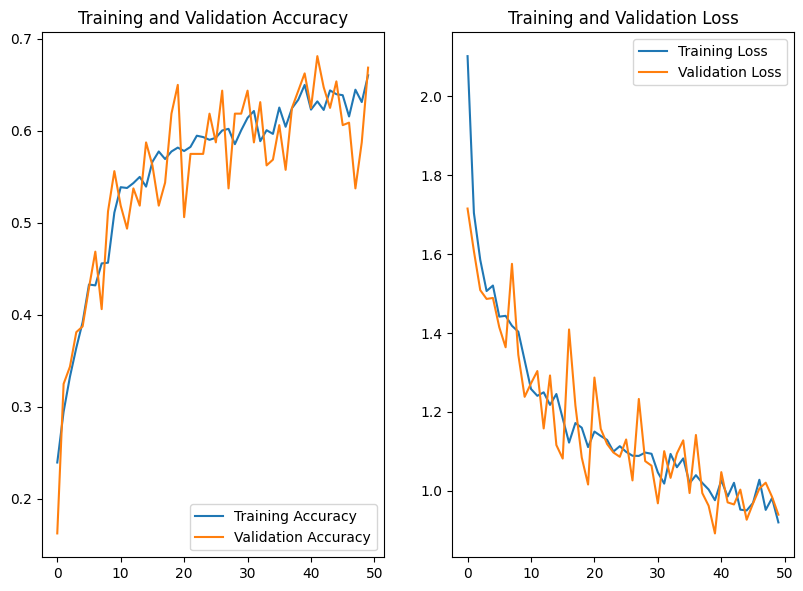

In [44]:
# plotting the comparison graphs
plt.figure(figsize = (15,15))

# Accuracy Table
plt.subplot(2,3,1)
plt.plot(range(EPOCHS),train_acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Table
plt.subplot(2,3,2)
plt.plot(range(EPOCHS),train_loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
#Validation on Test Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


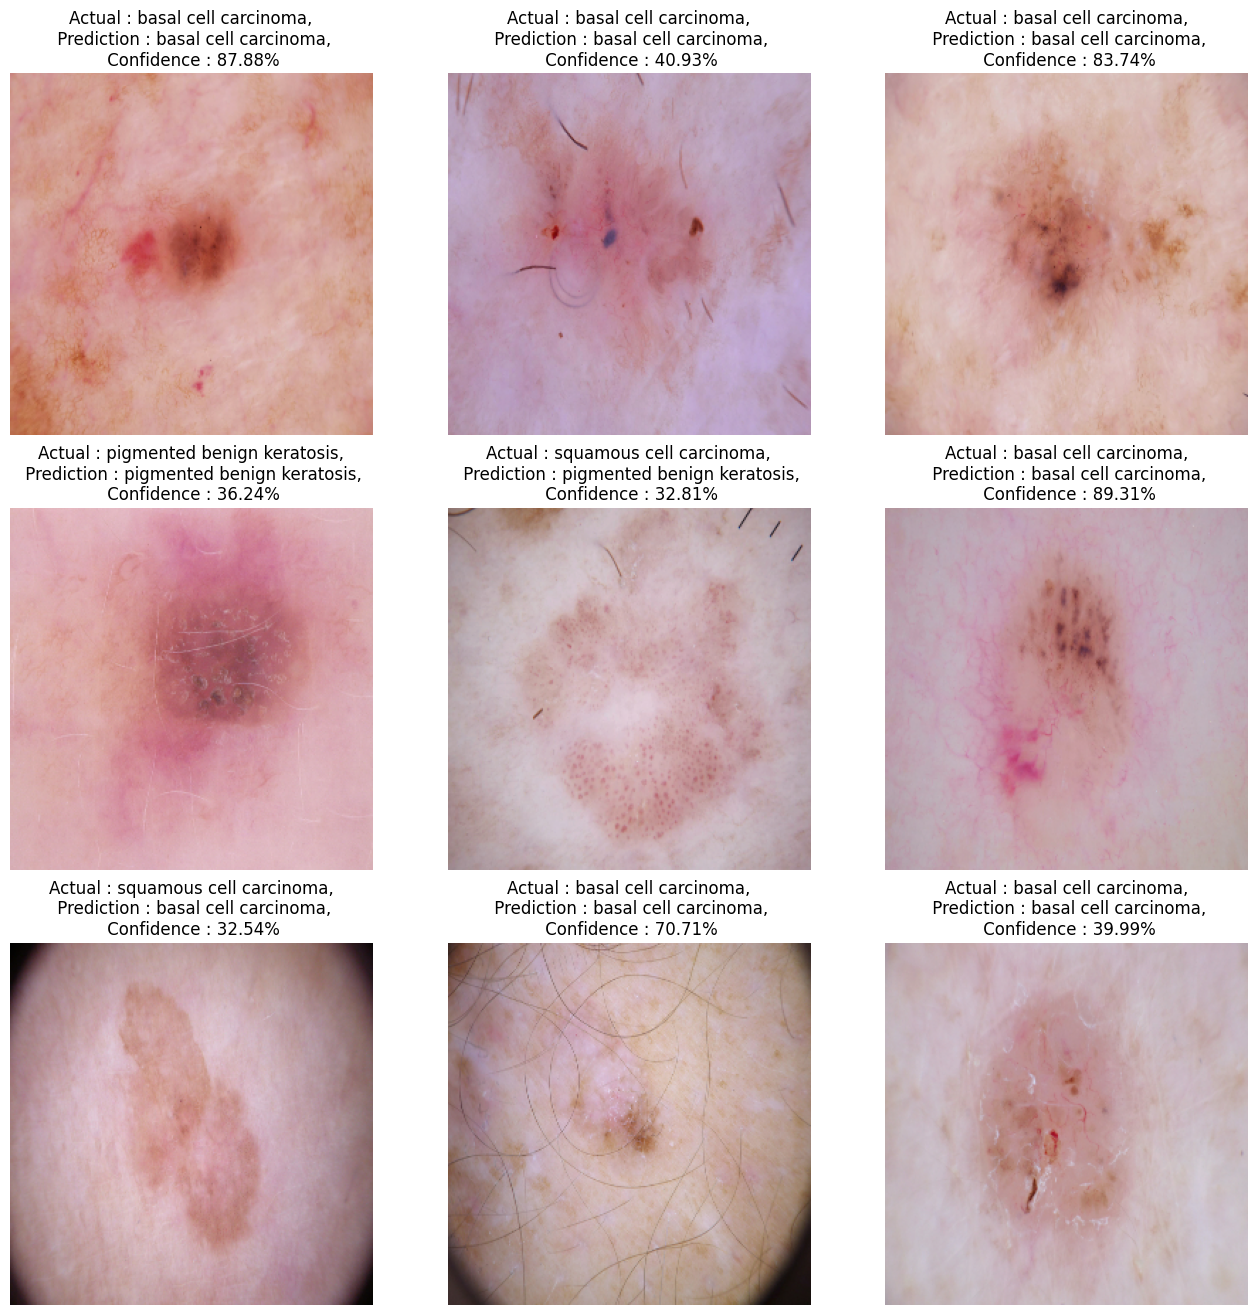

In [54]:
# plotting batch of test images with its actual label, predicted label and confidence
plt.figure(figsize = (16,16))
for batch_image, batch_label in test_pc.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_names[batch_label[i]]
    
        plt.imshow(image)
    
        batch_prediction = model.predict(batch_image)
        predicted_class = class_names[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)
        
        plt.title(f'Actual : {label},\n Prediction : {predicted_class},\n Confidence : {confidence}%')
    
        plt.axis('off')

In [ ]:
#Step 7 : Predicting on New Images

In [70]:
# importing new dataset for new predictions
unk_lf = tf.keras.preprocessing.image_dataset_from_directory("C:/Users/sayan/OneDrive/Desktop/testing/New folder",
                                                             image_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 6 files belonging to 1 classes.


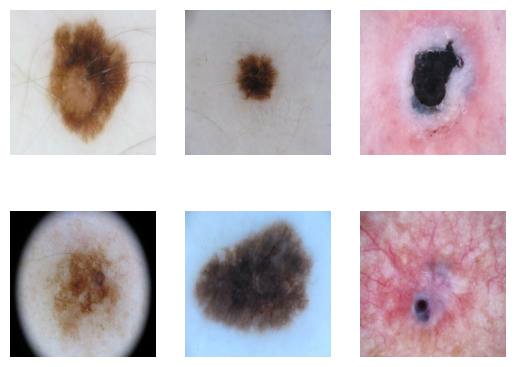

In [71]:
# viewing new images
for image_batch, label_batch in unk_lf.take(1):
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


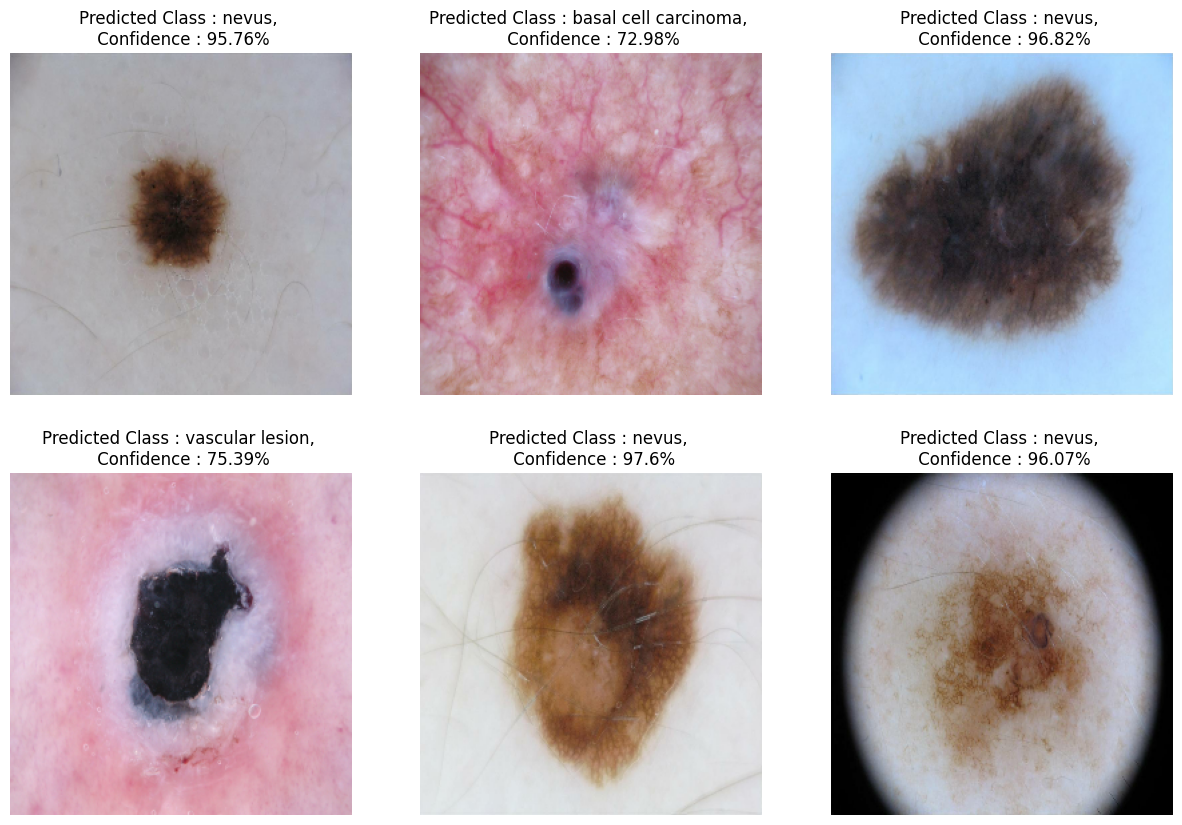

In [72]:
# predicting the class
plt.figure(figsize = (15,10))
for image_batch, label_batch in unk_lf.take(1):
    for i in range(6):
        ax = plt.subplot(2,3,i+1)
        image = image_batch[i].numpy().astype("uint8")
        label = class_names[label_batch[i]]
        
        plt.imshow(image)

                
        unk_lf_pred = model.predict(image_batch)
        pred_class = class_names[np.argmax(unk_lf_pred[i])]
        confidence = round(np.max(unk_lf_pred[i])*100, 2)
        
        plt.title(f'Predicted Class : {pred_class}, \n Confidence : {confidence}%')
        
        plt.axis("off")